__Бонусные пункт__

Исследуйте другие техники подбора шага, озвученные на семинаре: 

1) Уменьшающийся с номером итерации шаг,

2) Наискорейший спуск: $\gamma_k = \arg\min_{\gamma} f(x_k - \gamma \nabla f(x_k))$,

3) Правила Армихо, Вульфа и Гольдстейна: смотри параграф 3.1 из https://www.csie.ntu.edu.tw/~r97002/temp/num_optimization.pdf,

4) Шаг Поляка-Шора: $\gamma_k = \tfrac{f(x^k) - f(x^*)}{\alpha \|\nabla f(x^k)\|^2}$, где $\alpha \geq 1$.

Эксперименты нужно провести, как для сильно выпуклых, так и выпуклых задач. Сравните не только число итераций, но и время работы методов. Учтите, что правила Армихо, Вульфа, Гольстейна и Поляка-Шора требуют подбора дополнительных параметров эврестически (поиграйте с этими параметрами отдельно и выберете какой подходит лучше).

In [1]:
from scipy.stats import ortho_group
import GD
import numpy as np
def get_matrix_2(d,mu,L):
    vec=np.random.uniform(low=mu, high=L, size=d-2)
    vec=np.append(vec,mu)
    vec=np.append(vec,L)
    print("eigenvals are{}".format(vec))
    O=ortho_group.rvs(dim=d)
    D=np.diag(vec)
    temp=np.matmul(np.transpose(O),D)
    result = np.matmul(temp,O)
    return result
    

# Сильно выпуклая задача

Генерируем матрицу

In [2]:
DIMENSIONS=10
mu=1
L=100
EPSILON=0.00000001

In [3]:
A=get_matrix_2(DIMENSIONS,mu,L)

eigenvals are[ 80.03515642  55.44435816  82.9595239   40.8037113   70.03796692
  26.86672284  88.48021112   4.32086465   1.         100.        ]


In [4]:
start=np.ones(len(A))
import matplotlib.pyplot as plt

In [5]:
b=np.random.rand(DIMENSIONS)
b

array([0.81352982, 0.22914246, 0.0553749 , 0.8533052 , 0.25844194,
       0.89081948, 0.91493205, 0.22294207, 0.88724912, 0.1225808 ])

In [6]:
def f(x):
    return 1/2*np.matmul(np.matmul(x.T,A),x)-np.matmul(b.T,x)
def gradient(A,b,x):
    return np.matmul(A,x)-np.transpose(b)
def grad_f(x):
    return gradient(A,b,x)

In [7]:
x_exact=np.linalg.solve(A,b)

## 1. Стандартный спуск

In [8]:
standart_descent=GD.GradientDescent(f,grad_f,L,start,stopping_criteria='exact_sol',additional_data=[A,b,x_exact])
GD_RESULTS=standart_descent.compute()

amount of iterations is 999


## 2. Уменьшающийся с номером итерации шаг

### $$\gamma_k=\frac{1}{k+L}$$

In [9]:
declining_step=GD.GradientDescent(f,grad_f,L,start,stopping_criteria='exact_sol',step_choose='declining_step',additional_data=[A,b,x_exact])
DEC_STEP_GD_RESULTS = declining_step.compute()

amount of iterations is 999


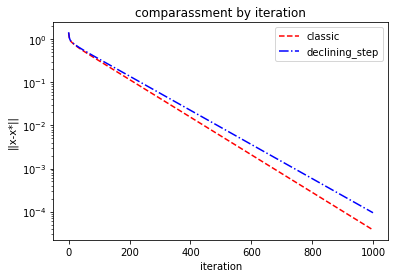

In [10]:
plt.plot(range(len(GD_RESULTS[2])), GD_RESULTS[2], color='red',linestyle='--', label='classic')
plt.plot(range(len(DEC_STEP_GD_RESULTS[2])), DEC_STEP_GD_RESULTS[2], color='blue',linestyle='-.', label='declining_step')
 
plt.xlabel('iteration')
plt.ylabel('||x-x*||')
plt.title('comparassment by iteration')
plt.yscale('log')
plt.legend()
plt.show()


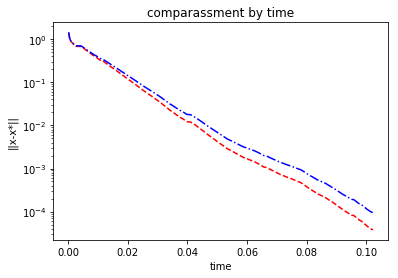

In [11]:
plt.plot(GD_RESULTS[1], GD_RESULTS[2], color='red',linestyle='--', label='classic')
plt.plot(GD_RESULTS[1], DEC_STEP_GD_RESULTS[2], color='blue',linestyle='-.', label='declining_step')
 
plt.xlabel("time")
plt.ylabel("||x-x*||")
plt.yscale('log')
plt.title('comparassment by time')
plt.show()

## 3. Наискорейший спуск

#### $$\nabla f(x_k)=g;\;\;\gamma_0 = \frac{g^Tg}{g^TAg}$$

In [12]:
fastest_declining=GD.GradientDescent(f,grad_f,L,start,step_choose='argmin_step',stopping_criteria='exact_sol',additional_data=[A,b,x_exact])
FAST_DECLINE_RESULTS=fastest_declining.compute()

amount of iterations is 749


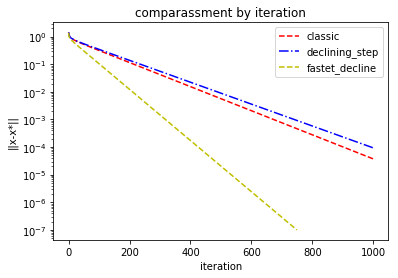

In [13]:
plt.plot(range(len(GD_RESULTS[2])), GD_RESULTS[2], color='red',linestyle='--', label='classic')
plt.plot(range(len(DEC_STEP_GD_RESULTS[2])), DEC_STEP_GD_RESULTS[2], color='blue',linestyle='-.', label='declining_step')
plt.plot(range(len(FAST_DECLINE_RESULTS[2])),FAST_DECLINE_RESULTS[2],color='y',linestyle='--',label='fastet_decline')
plt.xlabel('iteration')
plt.ylabel('||x-x*||')
plt.title('comparassment by iteration')
plt.yscale('log')
plt.legend()
plt.show()


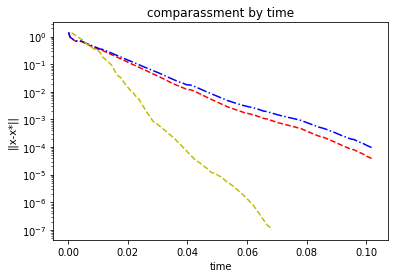

In [14]:
plt.plot(GD_RESULTS[1], GD_RESULTS[2], color='red',linestyle='--', label='classic')
plt.plot(GD_RESULTS[1], DEC_STEP_GD_RESULTS[2], color='blue',linestyle='-.', label='declining_step')
plt.plot(FAST_DECLINE_RESULTS[1], FAST_DECLINE_RESULTS[2],color='y',linestyle="--",label='fastest_decline') 
plt.xlabel("time")
plt.ylabel("||x-x*||")
plt.yscale('log')
plt.title('comparassment by time')
plt.show()

### 3.Armijo condition

#### $$f(x_k+\alpha p_k) \leq f(x_k)+c_1\alpha \nabla f(x_k)^Tp_k$$

$$\frac{1}{2}(x_k+ap_k)^TA(x_k+ap_k)-b^T(x_k+ap_k)\leq \frac{1}{2}x_k^TAx_k-b^Tx_k+c_1a\nabla f(x_k)^Tp_k$$

$$x_k^TAap_k+\frac{1}{2}a^2p_k^TAp_k-ab^Tp_k \leq c_1a \nabla f(x_k)^Tp_k$$

$$x_k^TAp_k+\frac{a}{2}p_k^TAp_k-b^Tp_k \leq c_1 \nabla f(x_k)^Tp_k$$    

В частности можно потребовать равенства : 

$$a=2\frac{c_1\nabla f(x_k)^Tp_k+b^Tp_k-x_k^TAp_k}{p_k^TAp_k}$$

#### $$a=2\frac{-c_1||\nabla f(x_k)||^2-b^T\nabla f(x_k)+x_k^TA\nabla f(x_k)}{\nabla f(x_k)A \nabla f(x_k)}$$

__Нужно ввести коэффициент $c_1 \in (0,1)$__

Пробежимся с шагом 0.1 по всем числам в этом интервале и найдем где Армихо работает лучше всего :

In [15]:
armijo_results=[]
for j in range(0,10):
    Armijo_rule=GD.GradientDescent(f,grad_f,L,start,step_choose='armijo_rule',stopping_criteria='exact_sol',additional_data=[A,b,x_exact,j/10])
    ARMIJO_RESULTS=Armijo_rule.compute()
    armijo_results.append(ARMIJO_RESULTS)
    
min_index=0
for j in range(len(armijo_results)):
    if(len(armijo_results[j][1])<len(armijo_results[min_index][1])):
        min_index=j
min_index

c=0.1*min_index
print(c)

amount of iterations is 999
amount of iterations is 800
amount of iterations is 800
amount of iterations is 800
amount of iterations is 800
amount of iterations is 749
amount of iterations is 188
amount of iterations is 186
amount of iterations is 310
amount of iterations is 358
0.7000000000000001


In [16]:
Armijo_rule=GD.GradientDescent(f,grad_f,L,start,step_choose='armijo_rule',stopping_criteria='exact_sol',additional_data=[A,b,x_exact,c])
ARMIJO_RESULTS=Armijo_rule.compute()

amount of iterations is 190


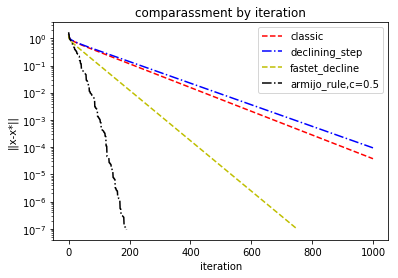

In [17]:
plt.plot(range(len(GD_RESULTS[2])), GD_RESULTS[2], color='red',linestyle='--', label='classic')
plt.plot(range(len(DEC_STEP_GD_RESULTS[2])), DEC_STEP_GD_RESULTS[2], color='blue',linestyle='-.', label='declining_step')
plt.plot(range(len(FAST_DECLINE_RESULTS[2])),FAST_DECLINE_RESULTS[2],color='y',linestyle='--',label='fastet_decline')
plt.plot(range(len(ARMIJO_RESULTS[2])),ARMIJO_RESULTS[2],color='black',linestyle='-.',label='armijo_rule,c=0.5')
plt.xlabel('iteration')
plt.ylabel('||x-x*||')
plt.title('comparassment by iteration')
plt.yscale('log')
plt.legend()
plt.show()

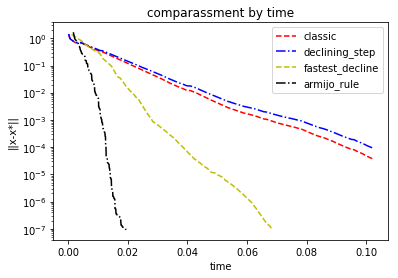

In [18]:
plt.plot(GD_RESULTS[1], GD_RESULTS[2], color='red',linestyle='--', label='classic')
plt.plot(GD_RESULTS[1], DEC_STEP_GD_RESULTS[2], color='blue',linestyle='-.', label='declining_step')
plt.plot(FAST_DECLINE_RESULTS[1], FAST_DECLINE_RESULTS[2],color='y',linestyle="--",label='fastest_decline') 
plt.plot(ARMIJO_RESULTS[1], ARMIJO_RESULTS[2],color='black',linestyle='-.',label='armijo_rule') 

plt.xlabel("time")
plt.ylabel("||x-x*||")
plt.title('comparassment by time')
plt.yscale('log')
plt.legend()
plt.show()

### 4.Wolfe conditions

$$1)\;\;\;f(x_k+ap_k) \leq f(x_k)+c_1 a \nabla f(x_k)^T p_k$$

$$2)\;\;\; \nabla f(x_k+ap_k)^Tp_k \geq c_2 \nabla f(x_k)^T p_k$$

Мы уже знаем, что первое условие можно привести к виду :

$$a \leq 2 \frac{c_1 \nabla f(x_k)p_k+b^Tp_k-x_k^TAp_k}{p_k^TAp_k}$$

Из второго условия можно получить оценку снизу :

$$p_k^T(A(x_k+ap_k)+b) \geq c_2 \nabla f(x_k)^Tp_k$$

$$ap_k^TAp_k \geq  -p_k^TAx_k-p_k^Tb  + c_2 \nabla f(x_k)^Tp_k $$

$$a \geq \frac{c_2 \nabla f(x_k)^Tp_k - p_k^TAx_k-p_k^Tb}{p_kAp_k}$$

Т.е. Wolfe conditions переходят в следующее условие на шаг :

$$a \in \left[ \frac{c_2 \nabla f(x_k)^Tp_k - p_k^TAx_k-p_k^Tb}{p_kAp_k} ; 2 \frac{c_1 \nabla f(x_k)p_k+b^Tp_k-x_k^TAp_k}{p_k^TAp_k} \right] $$

Нужно выбрать константы $0<c1<c2<1$

In [19]:
wolfe_results=[]
for i in range(1,10,1):
    c1=i/10
    for j in range(i+1,10,1):
        c2=j/10
        WOLFE_RULE=GD.GradientDescent(f,grad_f,L,start,step_choose='wolf_rule',stopping_criteria='exact_sol',additional_data=[A,b,x_exact,c1,c2])
        WOLFE_RESULTS=WOLFE_RULE.compute()
        wolfe_results.append(WOLFE_RESULTS[2][-1])

amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations

In [20]:
min_index=0
for i in range(len(wolfe_results)):
    if(wolfe_results[i]<wolfe_results[min_index]):
        min_index=i
print(min_index)

26


In [21]:
c1=0.1
c2=0.2

In [22]:
WOLFE_RULE=GD.GradientDescent(f,grad_f,L,start,step_choose='wolf_rule',stopping_criteria='exact_sol',additional_data=[A,b,x_exact,c1,c2])
WOLFE_RESULTS=WOLFE_RULE.compute()

amount of iterations is 999


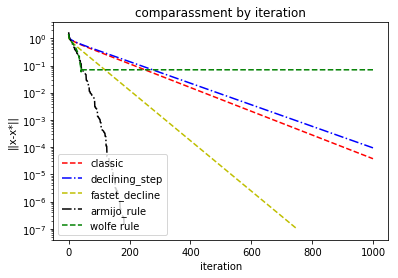

In [23]:
plt.plot(range(len(GD_RESULTS[2])), GD_RESULTS[2], color='red',linestyle='--', label='classic')
plt.plot(range(len(DEC_STEP_GD_RESULTS[2])), DEC_STEP_GD_RESULTS[2], color='blue',linestyle='-.', label='declining_step')
plt.plot(range(len(FAST_DECLINE_RESULTS[2])),FAST_DECLINE_RESULTS[2],color='y',linestyle='--',label='fastet_decline')
plt.plot(range(len(ARMIJO_RESULTS[2])),ARMIJO_RESULTS[2],color='black',linestyle='-.',label='armijo_rule')
plt.plot(range(len(WOLFE_RESULTS[2])),WOLFE_RESULTS[2],color='g',linestyle='--',label='wolfe rule')
plt.xlabel('iteration')
plt.ylabel('||x-x*||')
plt.title('comparassment by iteration')
plt.yscale('log')
plt.legend()
plt.show()

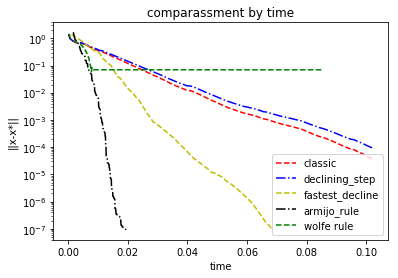

In [24]:
plt.plot(GD_RESULTS[1], GD_RESULTS[2], color='red',linestyle='--', label='classic')
plt.plot(GD_RESULTS[1], DEC_STEP_GD_RESULTS[2], color='blue',linestyle='-.', label='declining_step')
plt.plot(FAST_DECLINE_RESULTS[1], FAST_DECLINE_RESULTS[2],color='y',linestyle="--",label='fastest_decline') 
plt.plot(ARMIJO_RESULTS[1], ARMIJO_RESULTS[2],color='black',linestyle='-.',label='armijo_rule') 
plt.plot(WOLFE_RESULTS[1],WOLFE_RESULTS[2],color='g',linestyle='--',label='wolfe rule')
plt.xlabel("time")
plt.ylabel("||x-x*||")
plt.title('comparassment by time')
plt.yscale('log')
plt.legend()
plt.show()

Какие бы параметры я не пробовал использовать на франке-Вульфе, он перестает сходится при достижении определенной точности, шаг выбирается посередине отрезка

### 5.Goldstein conditions

$$f(x_k)+(1-c)a\nabla f(x_k)^T p_k \leq f(x_k+ap_k) \leq f(x_k) + c a \nabla f(x_k)^Tp_k$$

Перенесем $f(x_k)$ в центр, распишем разность функции в точках, затем сократим все неравенство на $a$, вернем из центра все члены без множителя $a$ на бока, получим следующее выражение : 

$$(1-c)\nabla f(x_k)p_k-x_k^TAp_k+b^Tp_k \leq \frac{a}{2}p_k^TAp_k \leq c\nabla f(x_k)p_k - x_k^TAp_k+b^Tp_k $$

т.е. 

$$a \in \left[ 2\frac{(1-c)\nabla f(x_k)p_k-x_k^TAp_k+b^Tp_k}{p_k^TAp_k}; 2\frac{c\nabla f(x_k)p_k - x_k^TAp_k+b^Tp_k}{p_k^TAp_k}\right]$$

точку $a$ будем брать как середину этого отрезка, $c\in(0,1/2)$

Найдем оптимальный c : gробежимся с шагом 0.1 по всем числам в интервале и найдем где Гольштейн работает лучше всего :

In [25]:
goldstein_results=[]
for j in range(1,5):
    GOLDSTEIN=GD.GradientDescent(f,grad_f,L,start,step_choose='goldstein_condition',stopping_criteria='exact_sol',additional_data=[A,b,x_exact,j/10])
    GOLDSTEIN_RESULTS=GOLDSTEIN.compute()
    goldstein_results.append(GOLDSTEIN_RESULTS)
    
min_index=0
for j in range(len(goldstein_results)):
    if(len(goldstein_results[j][1])<len(goldstein_results[min_index][1])):
        min_index=j
min_index

c=0.1*min_index+0.1
print(c)

amount of iterations is 749
amount of iterations is 749
amount of iterations is 749
amount of iterations is 749
0.1


In [26]:
GOLDSTEIN=GD.GradientDescent(f,grad_f,L,start,step_choose='goldstein_condition',stopping_criteria='exact_sol',additional_data=[A,b,x_exact,c])
GOLDSTEIN_RESULTS=GOLDSTEIN.compute()

amount of iterations is 749


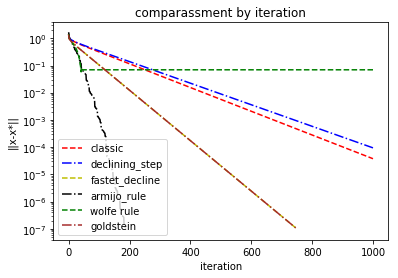

In [27]:
plt.plot(range(len(GD_RESULTS[2])), GD_RESULTS[2], color='red',linestyle='--', label='classic')
plt.plot(range(len(DEC_STEP_GD_RESULTS[2])), DEC_STEP_GD_RESULTS[2], color='blue',linestyle='-.', label='declining_step')
plt.plot(range(len(FAST_DECLINE_RESULTS[2])),FAST_DECLINE_RESULTS[2],color='y',linestyle='--',label='fastet_decline')
plt.plot(range(len(ARMIJO_RESULTS[2])),ARMIJO_RESULTS[2],color='black',linestyle='-.',label='armijo_rule')
plt.plot(range(len(WOLFE_RESULTS[2])),WOLFE_RESULTS[2],color='g',linestyle='--',label='wolfe rule')
plt.plot(range(len(GOLDSTEIN_RESULTS[2])),GOLDSTEIN_RESULTS[2],color='brown',linestyle='-.',label='goldstein')

plt.xlabel('iteration')
plt.ylabel('||x-x*||')
plt.title('comparassment by iteration')
plt.yscale('log')
plt.legend()
plt.show()

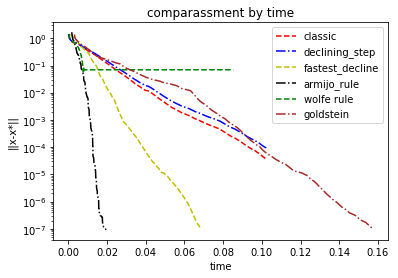

In [28]:
plt.plot(GD_RESULTS[1], GD_RESULTS[2], color='red',linestyle='--', label='classic')
plt.plot(GD_RESULTS[1], DEC_STEP_GD_RESULTS[2], color='blue',linestyle='-.', label='declining_step')
plt.plot(FAST_DECLINE_RESULTS[1], FAST_DECLINE_RESULTS[2],color='y',linestyle="--",label='fastest_decline') 
plt.plot(ARMIJO_RESULTS[1], ARMIJO_RESULTS[2],color='black',linestyle='-.',label='armijo_rule') 
plt.plot(WOLFE_RESULTS[1],WOLFE_RESULTS[2],color='g',linestyle='--',label='wolfe rule')
plt.plot(GOLDSTEIN_RESULTS[1],GOLDSTEIN_RESULTS[2],color='brown',linestyle='-.',label='goldstein')

plt.xlabel("time")
plt.ylabel("||x-x*||")
plt.title('comparassment by time')
plt.yscale('log')
plt.legend()
plt.show()

### 6. Шаг Поляка-Шора

Требуется отобрать шаг $\alpha \geq 1$. Попробуем метод для следующий альф :

In [29]:
alphas=[1,5,10,20,40,80,100,400,1000]

In [30]:
pol_results=[]
for alpha in alphas:
    POL=GD.GradientDescent(f,grad_f,L,start,step_choose='pol_shor',stopping_criteria='exact_sol',additional_data=[A,b,x_exact,alpha])
    POL_RESULTS=POL.compute()
    pol_results.append(POL_RESULTS)
    
min_index=0
for j in range(len(pol_results)):
    if(len(pol_results[j][1])<len(pol_results[min_index][1])):
        min_index=j
min_index

alpha=alphas[min_index]
print(alpha)

amount of iterations is 251
amount of iterations is 452
amount of iterations is 676
amount of iterations is 897
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
1


In [31]:
POL_SHOR=GD.GradientDescent(f,grad_f,L,start,step_choose='pol_shor',stopping_criteria='exact_sol',additional_data=[A,b,x_exact,alpha])
POL_SHOR_RESULTS=POL_SHOR.compute()

amount of iterations is 251


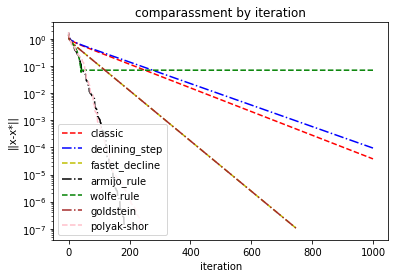

In [32]:
plt.plot(range(len(GD_RESULTS[2])), GD_RESULTS[2], color='red',linestyle='--', label='classic')
plt.plot(range(len(DEC_STEP_GD_RESULTS[2])), DEC_STEP_GD_RESULTS[2], color='blue',linestyle='-.', label='declining_step')
plt.plot(range(len(FAST_DECLINE_RESULTS[2])),FAST_DECLINE_RESULTS[2],color='y',linestyle='--',label='fastet_decline')
plt.plot(range(len(ARMIJO_RESULTS[2])),ARMIJO_RESULTS[2],color='black',linestyle='-.',label='armijo_rule')
plt.plot(range(len(WOLFE_RESULTS[2])),WOLFE_RESULTS[2],color='g',linestyle='--',label='wolfe rule')
plt.plot(range(len(GOLDSTEIN_RESULTS[2])),GOLDSTEIN_RESULTS[2],color='brown',linestyle='-.',label='goldstein')
plt.plot(range(len(POL_SHOR_RESULTS[2])),POL_SHOR_RESULTS[2],color='pink',linestyle='--',label='polyak-shor')
plt.xlabel('iteration')
plt.ylabel('||x-x*||')
plt.title('comparassment by iteration')
plt.yscale('log')
plt.legend()
plt.show()

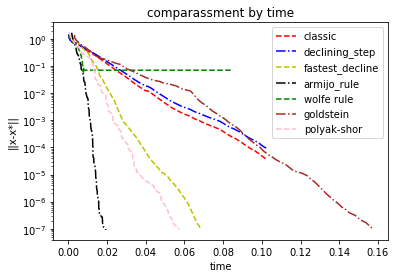

In [33]:
plt.plot(GD_RESULTS[1], GD_RESULTS[2], color='red',linestyle='--', label='classic')
plt.plot(GD_RESULTS[1], DEC_STEP_GD_RESULTS[2], color='blue',linestyle='-.', label='declining_step')
plt.plot(FAST_DECLINE_RESULTS[1], FAST_DECLINE_RESULTS[2],color='y',linestyle="--",label='fastest_decline') 
plt.plot(ARMIJO_RESULTS[1], ARMIJO_RESULTS[2],color='black',linestyle='-.',label='armijo_rule') 
plt.plot(WOLFE_RESULTS[1],WOLFE_RESULTS[2],color='g',linestyle='--',label='wolfe rule')
plt.plot(GOLDSTEIN_RESULTS[1],GOLDSTEIN_RESULTS[2],color='brown',linestyle='-.',label='goldstein')
plt.plot(POL_SHOR_RESULTS[1],POL_SHOR_RESULTS[2],color='pink',linestyle='--',label='polyak-shor')
plt.xlabel("time")
plt.ylabel("||x-x*||")
plt.title('comparassment by time')
plt.yscale('log')
plt.legend()
plt.yscale('log')
plt.show()

## Слабо выпуклая задача

In [34]:
DIMENSIONS=10
mu=0.0001
L=100
EPSILON=0.00000001

In [35]:
A=get_matrix_2(DIMENSIONS,mu,L)

eigenvals are[2.76555850e+01 9.63745943e+01 6.79861343e+01 2.95559412e+01
 1.17263347e+01 6.80765813e+01 4.71450454e+00 6.59704409e+01
 1.00000000e-04 1.00000000e+02]


In [36]:
start=np.ones(len(A))
import matplotlib.pyplot as plt

In [37]:
b=np.random.rand(DIMENSIONS)
b

array([0.39617572, 0.34970375, 0.00764075, 0.79113547, 0.83680885,
       0.0261118 , 0.72439398, 0.94655513, 0.91120891, 0.25722698])

In [38]:
def f(x):
    return 1/2*np.matmul(np.matmul(x.T,A),x)-np.matmul(b.T,x)
def gradient(A,b,x):
    return np.matmul(A,x)-np.transpose(b)
def grad_f(x):
    return gradient(A,b,x)

In [39]:
x_exact=np.linalg.solve(A,b)

## 1. Стандартный спуск

In [40]:
standart_descent=GD.GradientDescent(f,grad_f,L,start,stopping_criteria='exact_sol',additional_data=[A,b,x_exact])
GD_RESULTS=standart_descent.compute()

amount of iterations is 999


## 2. Уменьшающийся с номером итерации шаг

### $$\gamma_k=\frac{1}{k+L}$$

In [41]:
declining_step=GD.GradientDescent(f,grad_f,L,start,stopping_criteria='exact_sol',step_choose='declining_step',additional_data=[A,b,x_exact])
DEC_STEP_GD_RESULTS = declining_step.compute()

amount of iterations is 999


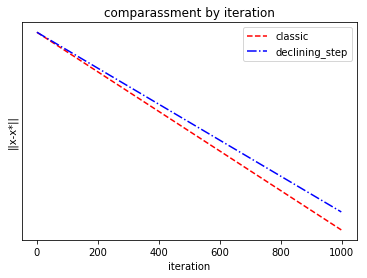

In [42]:
plt.plot(range(len(GD_RESULTS[2])), GD_RESULTS[2], color='red',linestyle='--', label='classic')
plt.plot(range(len(DEC_STEP_GD_RESULTS[2])), DEC_STEP_GD_RESULTS[2], color='blue',linestyle='-.', label='declining_step')
 
plt.xlabel('iteration')
plt.ylabel('||x-x*||')
plt.title('comparassment by iteration')
plt.yscale('log')
plt.legend()
plt.show()


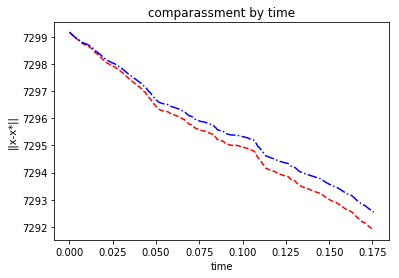

In [43]:
plt.plot(GD_RESULTS[1], GD_RESULTS[2], color='red',linestyle='--', label='classic')
plt.plot(GD_RESULTS[1], DEC_STEP_GD_RESULTS[2], color='blue',linestyle='-.', label='declining_step')
 
plt.xlabel("time")
plt.ylabel("||x-x*||")
plt.title('comparassment by time')
plt.show()

## 3. Наискорейший спуск

#### $$\nabla f(x_k)=g;\;\;\gamma_0 = \frac{g^Tg}{g^TAg}$$

In [44]:
fastest_declining=GD.GradientDescent(f,grad_f,L,start,step_choose='argmin_step',stopping_criteria='exact_sol',additional_data=[A,b,x_exact])
FAST_DECLINE_RESULTS=fastest_declining.compute()

amount of iterations is 999


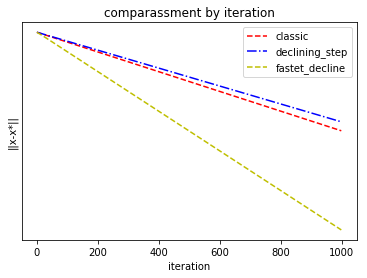

In [45]:
plt.plot(range(len(GD_RESULTS[2])), GD_RESULTS[2], color='red',linestyle='--', label='classic')
plt.plot(range(len(DEC_STEP_GD_RESULTS[2])), DEC_STEP_GD_RESULTS[2], color='blue',linestyle='-.', label='declining_step')
plt.plot(range(len(FAST_DECLINE_RESULTS[2])),FAST_DECLINE_RESULTS[2],color='y',linestyle='--',label='fastet_decline')
plt.xlabel('iteration')
plt.ylabel('||x-x*||')
plt.title('comparassment by iteration')
plt.yscale('log')
plt.legend()
plt.show()


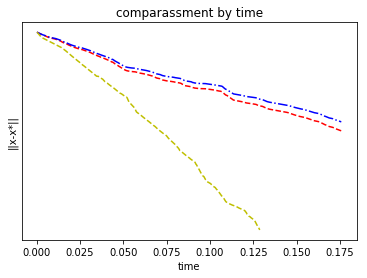

In [46]:
plt.plot(GD_RESULTS[1], GD_RESULTS[2], color='red',linestyle='--', label='classic')
plt.plot(GD_RESULTS[1], DEC_STEP_GD_RESULTS[2], color='blue',linestyle='-.', label='declining_step')
plt.plot(FAST_DECLINE_RESULTS[1], FAST_DECLINE_RESULTS[2],color='y',linestyle="--",label='fastest_decline') 
plt.xlabel("time")
plt.ylabel("||x-x*||")
plt.yscale('log')
plt.title('comparassment by time')
plt.show()

### 3.Armijo condition

__Нужно ввести коэффициент $c_1 \in (0,1)$__

Пробежимся с шагом 0.1 по всем числам в этом интервале и найдем где Армихо работает лучше всего :

In [47]:
armijo_results=[]
for j in range(0,10):
    Armijo_rule=GD.GradientDescent(f,grad_f,L,start,step_choose='armijo_rule',stopping_criteria='exact_sol',additional_data=[A,b,x_exact,j/10])
    ARMIJO_RESULTS=Armijo_rule.compute()
    armijo_results.append(ARMIJO_RESULTS)
    
min_index=0
for j in range(len(armijo_results)):
    if(armijo_results[j][2][-1]<armijo_results[min_index][2][-1]):
        min_index=j
min_index

c=0.1*min_index
print(c)

amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
0.6000000000000001


In [48]:
Armijo_rule=GD.GradientDescent(f,grad_f,L,start,step_choose='armijo_rule',stopping_criteria='exact_sol',additional_data=[A,b,x_exact,c])
ARMIJO_RESULTS=Armijo_rule.compute()

amount of iterations is 999


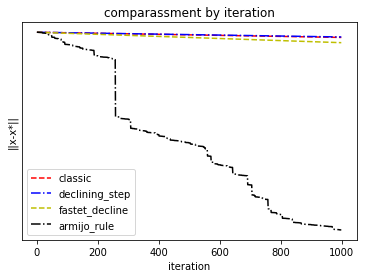

In [49]:
plt.plot(range(len(GD_RESULTS[2])), GD_RESULTS[2], color='red',linestyle='--', label='classic')
plt.plot(range(len(DEC_STEP_GD_RESULTS[2])), DEC_STEP_GD_RESULTS[2], color='blue',linestyle='-.', label='declining_step')
plt.plot(range(len(FAST_DECLINE_RESULTS[2])),FAST_DECLINE_RESULTS[2],color='y',linestyle='--',label='fastet_decline')
plt.plot(range(len(ARMIJO_RESULTS[2])),ARMIJO_RESULTS[2],color='black',linestyle='-.',label='armijo_rule')
plt.xlabel('iteration')
plt.ylabel('||x-x*||')
plt.title('comparassment by iteration')
plt.yscale('log')
plt.legend()
plt.show()

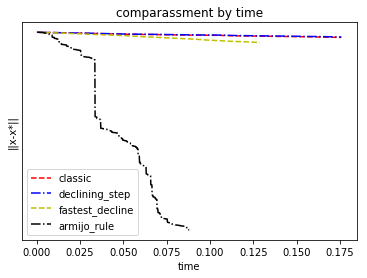

In [50]:
plt.plot(GD_RESULTS[1], GD_RESULTS[2], color='red',linestyle='--', label='classic')
plt.plot(GD_RESULTS[1], DEC_STEP_GD_RESULTS[2], color='blue',linestyle='-.', label='declining_step')
plt.plot(FAST_DECLINE_RESULTS[1], FAST_DECLINE_RESULTS[2],color='y',linestyle="--",label='fastest_decline') 
plt.plot(ARMIJO_RESULTS[1], ARMIJO_RESULTS[2],color='black',linestyle='-.',label='armijo_rule') 

plt.xlabel("time")
plt.ylabel("||x-x*||")
plt.title('comparassment by time')
plt.yscale('log')
plt.legend()
plt.show()

### 4.Wolfe conditions

$$a \in \left[ \frac{c_2 \nabla f(x_k)^Tp_k - p_k^TAx_k-p_k^Tb}{p_kAp_k} ; 2 \frac{c_1 \nabla f(x_k)p_k+b^Tp_k-x_k^TAp_k}{p_k^TAp_k} \right] $$

Нужно выбрать константы $0<c1<c2<1$

In [51]:
wolfe_results=[]
for i in range(1,10,1):
    c1=i/10
    for j in range(i+1,10,1):
        c2=j/10
        WOLFE_RULE=GD.GradientDescent(f,grad_f,L,start,step_choose='wolf_rule',stopping_criteria='exact_sol',additional_data=[A,b,x_exact,c1,c2])
        WOLFE_RESULTS=WOLFE_RULE.compute()
        wolfe_results.append(WOLFE_RESULTS[2][-1])

amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations

In [52]:
min_index=0
for i in range(len(wolfe_results)):
    if(wolfe_results[i]<wolfe_results[min_index]):
        min_index=i
print(min_index)

8


In [53]:
c1=0.1
c2=0.3

In [54]:
WOLFE_RULE=GD.GradientDescent(f,grad_f,L,start,step_choose='wolf_rule',stopping_criteria='exact_sol',additional_data=[A,b,x_exact,c1,c2])
WOLFE_RESULTS=WOLFE_RULE.compute()

amount of iterations is 999


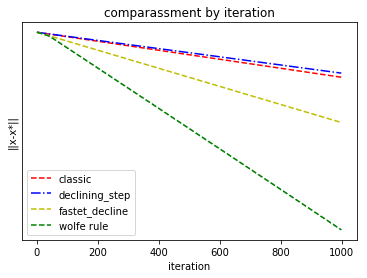

In [55]:
plt.plot(range(len(GD_RESULTS[2])), GD_RESULTS[2], color='red',linestyle='--', label='classic')
plt.plot(range(len(DEC_STEP_GD_RESULTS[2])), DEC_STEP_GD_RESULTS[2], color='blue',linestyle='-.', label='declining_step')
plt.plot(range(len(FAST_DECLINE_RESULTS[2])),FAST_DECLINE_RESULTS[2],color='y',linestyle='--',label='fastet_decline')
#plt.plot(range(len(ARMIJO_RESULTS[2])),ARMIJO_RESULTS[2],color='black',linestyle='-.',label='armijo_rule')
plt.plot(range(len(WOLFE_RESULTS[2])),WOLFE_RESULTS[2],color='g',linestyle='--',label='wolfe rule')
plt.xlabel('iteration')
plt.ylabel('||x-x*||')
plt.title('comparassment by iteration')
plt.yscale('log')
plt.legend()
plt.show()

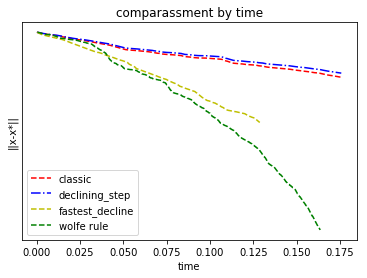

In [56]:
plt.plot(GD_RESULTS[1], GD_RESULTS[2], color='red',linestyle='--', label='classic')
plt.plot(GD_RESULTS[1], DEC_STEP_GD_RESULTS[2], color='blue',linestyle='-.', label='declining_step')
plt.plot(FAST_DECLINE_RESULTS[1], FAST_DECLINE_RESULTS[2],color='y',linestyle="--",label='fastest_decline') 
#plt.plot(ARMIJO_RESULTS[1], ARMIJO_RESULTS[2],color='black',linestyle='-.',label='armijo_rule') 
plt.plot(WOLFE_RESULTS[1],WOLFE_RESULTS[2],color='g',linestyle='--',label='wolfe rule')
plt.xlabel("time")
plt.ylabel("||x-x*||")
plt.title('comparassment by time')
plt.yscale('log')
plt.legend()
plt.show()

Какие бы параметры я не пробовал использовать на франке-Вульфе, он перестает сходится при достижении определенной точности, шаг выбирается посередине отрезка

### 5.Goldstein conditions

точку $a$ будем брать как середину этого отрезка, $c\in(0,1/2)$

Найдем оптимальный c : gробежимся с шагом 0.1 по всем числам в интервале и найдем где Гольштейн работает лучше всего :

In [57]:
goldstein_results=[]
for j in range(1,5):
    GOLDSTEIN=GD.GradientDescent(f,grad_f,L,start,step_choose='goldstein_condition',stopping_criteria='exact_sol',additional_data=[A,b,x_exact,j/10])
    GOLDSTEIN_RESULTS=GOLDSTEIN.compute()
    goldstein_results.append(GOLDSTEIN_RESULTS)
    
min_index=0
for j in range(len(goldstein_results)):
    if(goldstein_results[j][2][-1]<goldstein_results[min_index][2][-1]):
        min_index=j
min_index

c=0.1*min_index+0.1
print(c)

amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
0.4


In [58]:
GOLDSTEIN=GD.GradientDescent(f,grad_f,L,start,step_choose='goldstein_condition',stopping_criteria='exact_sol',additional_data=[A,b,x_exact,c])
GOLDSTEIN_RESULTS=GOLDSTEIN.compute()

amount of iterations is 999


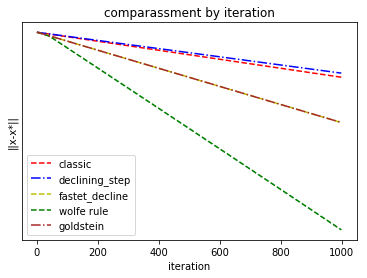

In [59]:
plt.plot(range(len(GD_RESULTS[2])), GD_RESULTS[2], color='red',linestyle='--', label='classic')
plt.plot(range(len(DEC_STEP_GD_RESULTS[2])), DEC_STEP_GD_RESULTS[2], color='blue',linestyle='-.', label='declining_step')
plt.plot(range(len(FAST_DECLINE_RESULTS[2])),FAST_DECLINE_RESULTS[2],color='y',linestyle='--',label='fastet_decline')
#plt.plot(range(len(ARMIJO_RESULTS[2])),ARMIJO_RESULTS[2],color='black',linestyle='-.',label='armijo_rule')
plt.plot(range(len(WOLFE_RESULTS[2])),WOLFE_RESULTS[2],color='g',linestyle='--',label='wolfe rule')
plt.plot(range(len(GOLDSTEIN_RESULTS[2])),GOLDSTEIN_RESULTS[2],color='brown',linestyle='-.',label='goldstein')

plt.xlabel('iteration')
plt.ylabel('||x-x*||')
plt.title('comparassment by iteration')
plt.yscale('log')
plt.legend()
plt.show()

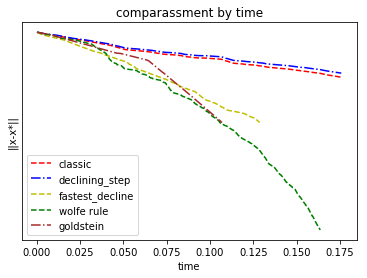

In [60]:
plt.plot(GD_RESULTS[1], GD_RESULTS[2], color='red',linestyle='--', label='classic')
plt.plot(GD_RESULTS[1], DEC_STEP_GD_RESULTS[2], color='blue',linestyle='-.', label='declining_step')
plt.plot(FAST_DECLINE_RESULTS[1], FAST_DECLINE_RESULTS[2],color='y',linestyle="--",label='fastest_decline') 
#plt.plot(ARMIJO_RESULTS[1], ARMIJO_RESULTS[2],color='black',linestyle='-.',label='armijo_rule') 
plt.plot(WOLFE_RESULTS[1],WOLFE_RESULTS[2],color='g',linestyle='--',label='wolfe rule')
plt.plot(GOLDSTEIN_RESULTS[1],GOLDSTEIN_RESULTS[2],color='brown',linestyle='-.',label='goldstein')

plt.xlabel("time")
plt.ylabel("||x-x*||")
plt.title('comparassment by time')
plt.yscale('log')
plt.legend()
plt.show()

### 6. Шаг Поляка-Шора

Требуется отобрать шаг $\alpha \geq 1$. Попробуем метод для следующий альф :

In [61]:
alphas=[1,5,10,20,40,80,100,400,1000]

In [62]:
pol_results=[]
for alpha in alphas:
    POL=GD.GradientDescent(f,grad_f,L,start,step_choose='pol_shor',stopping_criteria='exact_sol',additional_data=[A,b,x_exact,alpha])
    POL_RESULTS=POL.compute()
    pol_results.append(POL_RESULTS)
    
min_index=0
for j in range(len(pol_results)):
    if(pol_results[j][2][-1]<pol_results[min_index][2][-1]):
        min_index=j
min_index

alpha=alphas[min_index]
print(alpha)

amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
amount of iterations is 999
1


In [63]:
POL_SHOR=GD.GradientDescent(f,grad_f,L,start,step_choose='pol_shor',stopping_criteria='exact_sol',additional_data=[A,b,x_exact,alpha])
POL_SHOR_RESULTS=POL_SHOR.compute()

amount of iterations is 999


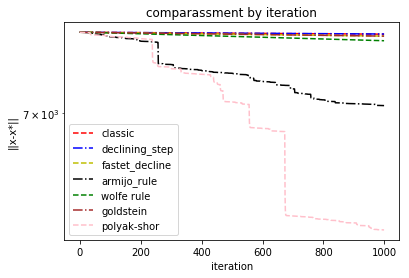

In [64]:
plt.plot(range(len(GD_RESULTS[2])), GD_RESULTS[2], color='red',linestyle='--', label='classic')
plt.plot(range(len(DEC_STEP_GD_RESULTS[2])), DEC_STEP_GD_RESULTS[2], color='blue',linestyle='-.', label='declining_step')
plt.plot(range(len(FAST_DECLINE_RESULTS[2])),FAST_DECLINE_RESULTS[2],color='y',linestyle='--',label='fastet_decline')
plt.plot(range(len(ARMIJO_RESULTS[2])),ARMIJO_RESULTS[2],color='black',linestyle='-.',label='armijo_rule')
plt.plot(range(len(WOLFE_RESULTS[2])),WOLFE_RESULTS[2],color='g',linestyle='--',label='wolfe rule')
plt.plot(range(len(GOLDSTEIN_RESULTS[2])),GOLDSTEIN_RESULTS[2],color='brown',linestyle='-.',label='goldstein')
plt.plot(range(len(POL_SHOR_RESULTS[2])),POL_SHOR_RESULTS[2],color='pink',linestyle='--',label='polyak-shor')
plt.xlabel('iteration')
plt.ylabel('||x-x*||')
plt.title('comparassment by iteration')
plt.yscale('log')
plt.legend()
plt.show()

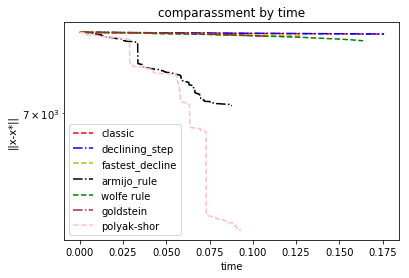

In [65]:
plt.plot(GD_RESULTS[1], GD_RESULTS[2], color='red',linestyle='--', label='classic')
plt.plot(GD_RESULTS[1], DEC_STEP_GD_RESULTS[2], color='blue',linestyle='-.', label='declining_step')
plt.plot(FAST_DECLINE_RESULTS[1], FAST_DECLINE_RESULTS[2],color='y',linestyle="--",label='fastest_decline') 
plt.plot(ARMIJO_RESULTS[1], ARMIJO_RESULTS[2],color='black',linestyle='-.',label='armijo_rule') 
plt.plot(WOLFE_RESULTS[1],WOLFE_RESULTS[2],color='g',linestyle='--',label='wolfe rule')
plt.plot(GOLDSTEIN_RESULTS[1],GOLDSTEIN_RESULTS[2],color='brown',linestyle='-.',label='goldstein')
plt.plot(POL_SHOR_RESULTS[1],POL_SHOR_RESULTS[2],color='pink',linestyle='--',label='polyak-shor')
plt.xlabel("time")
plt.ylabel("||x-x*||")
plt.title('comparassment by time')
plt.yscale('log')
plt.legend()
plt.show()